<a href="https://colab.research.google.com/github/ahmedhussein2001/ML-projects/blob/main/airline_passenger_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('airline_passenger_satisfaction.csv')
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [67]:
df.shape

(103904, 25)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [69]:
df.isna().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [70]:
df['Arrival Delay in Minutes'].value_counts()

,count
Arrival Delay in Minutes,
0.0,58159
1.0,2211
2.0,2064
3.0,1952
4.0,1907
...,...
458.0,1
729.0,1
382.0,1


In [71]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mode())

In [72]:
df.dropna(inplace=True)

In [73]:
df.drop(columns=['id','Unnamed: 0'], axis=1, inplace=True)

In [74]:
df.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,103594.0,39.380466,15.113125,7.0,27.0,40.0,51.0,85.0
Flight Distance,103594.0,1189.325202,997.297235,31.0,414.0,842.0,1743.0,4983.0
Inflight wifi service,103594.0,2.729753,1.327866,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103594.0,3.060081,1.525233,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103594.0,2.756984,1.398934,0.0,2.0,3.0,4.0,5.0
Gate location,103594.0,2.977026,1.277723,0.0,2.0,3.0,4.0,5.0
Food and drink,103594.0,3.202126,1.329401,0.0,2.0,3.0,4.0,5.0
Online boarding,103594.0,3.250497,1.349433,0.0,2.0,3.0,4.0,5.0
Seat comfort,103594.0,3.439765,1.318896,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103594.0,3.358341,1.333030,0.0,2.0,4.0,4.0,5.0


In [76]:
# Visualization

In [77]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

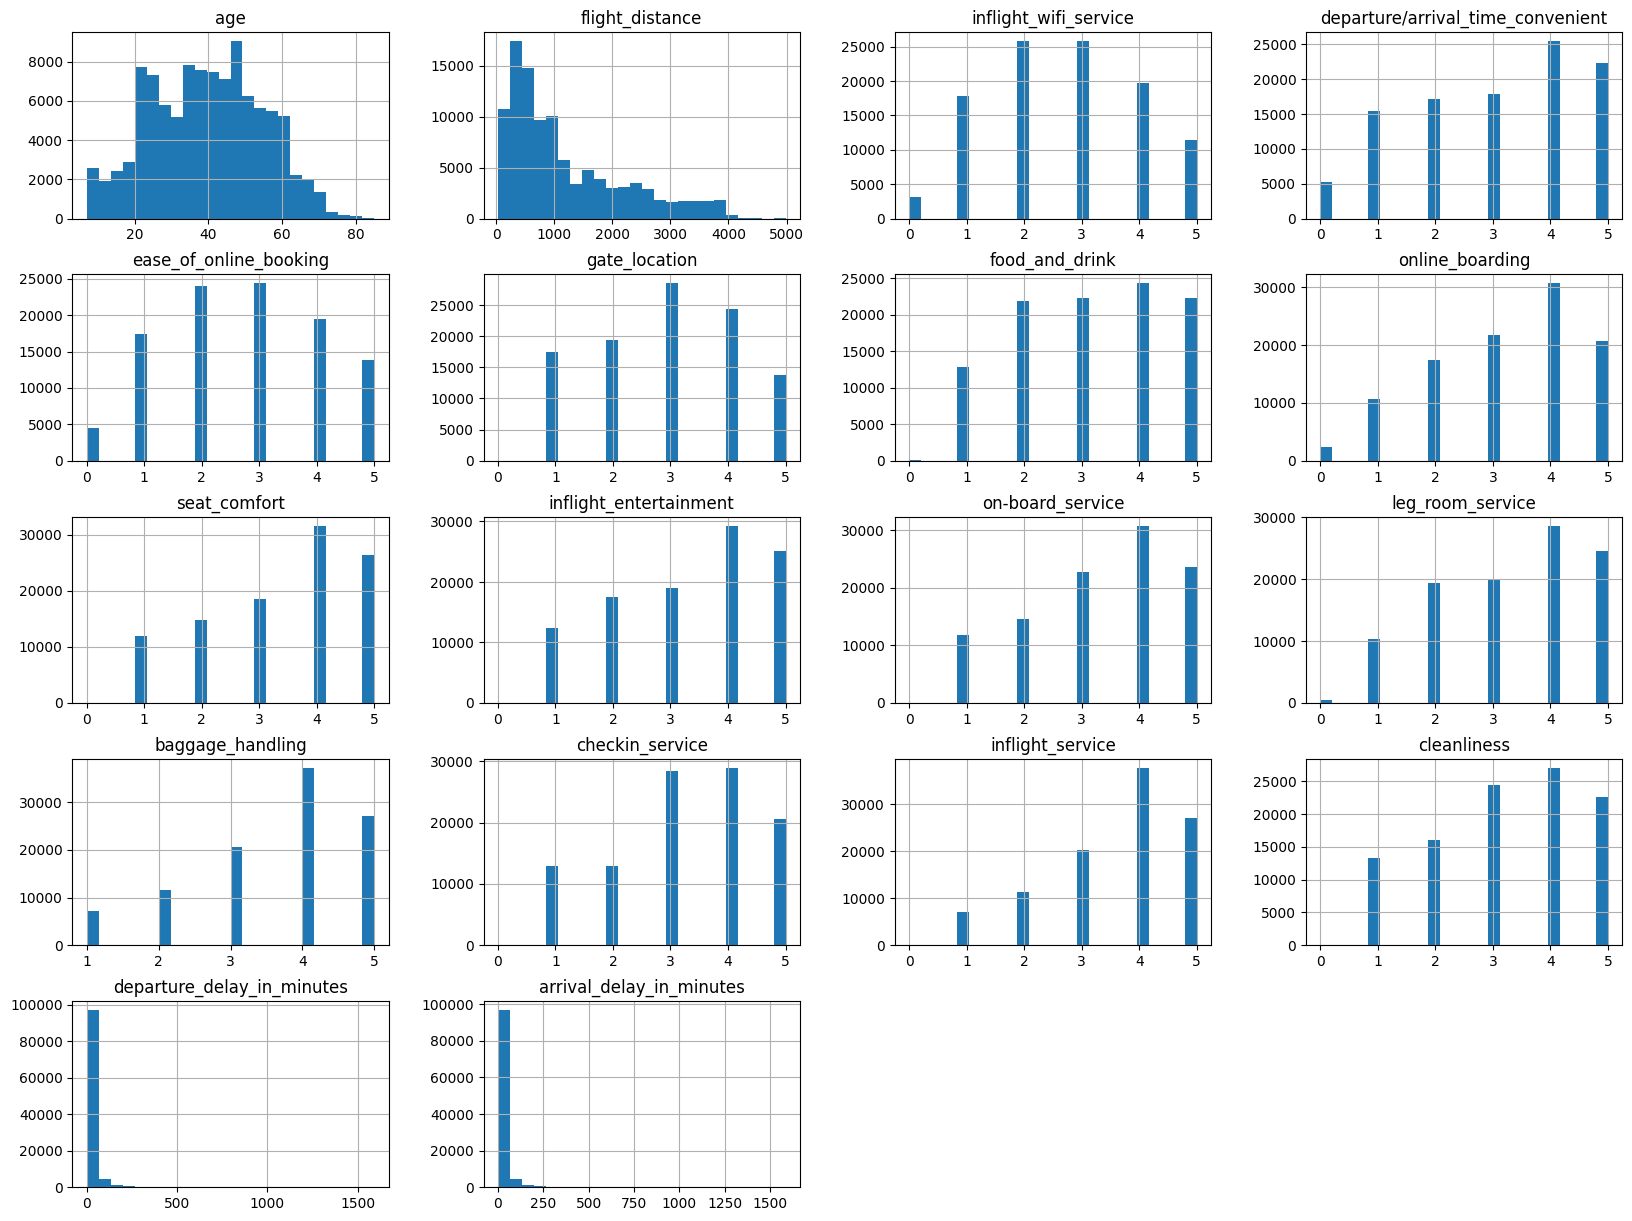

In [78]:
df.hist(bins=24, figsize=(20,15))
plt.show()

<Axes: xlabel='age', ylabel='Count'>

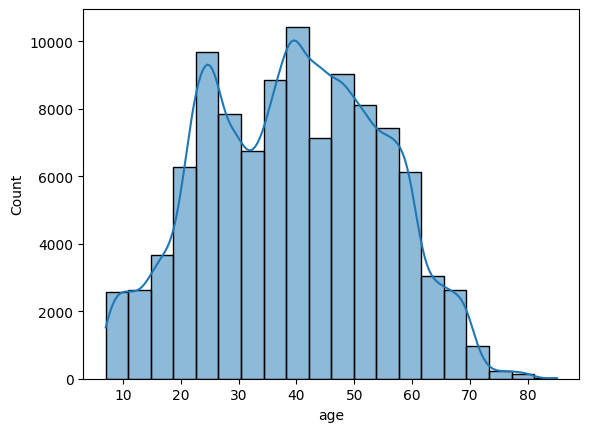

In [79]:
sns.histplot(data=df , bins=20 ,kde = True ,  x="age")

In [80]:
categorical = df.select_dtypes(include='object')
categorical.columns

Index(['gender', 'customer_type', 'type_of_travel', 'class', 'satisfaction'], dtype='object')

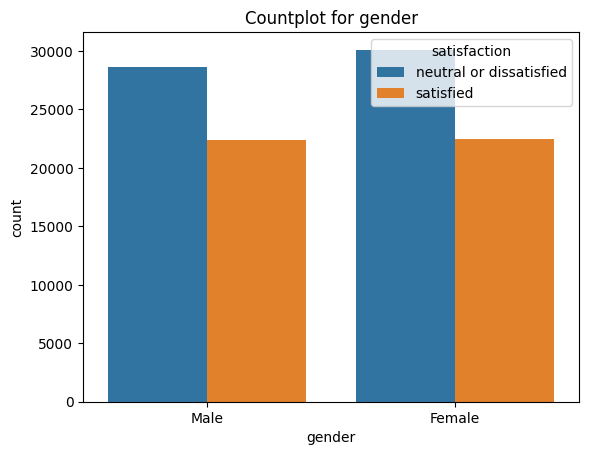

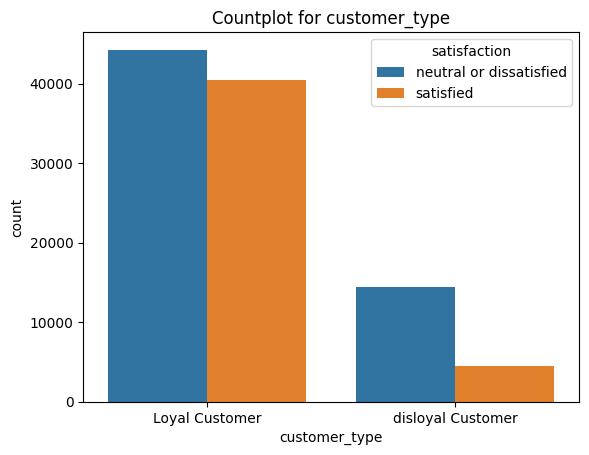

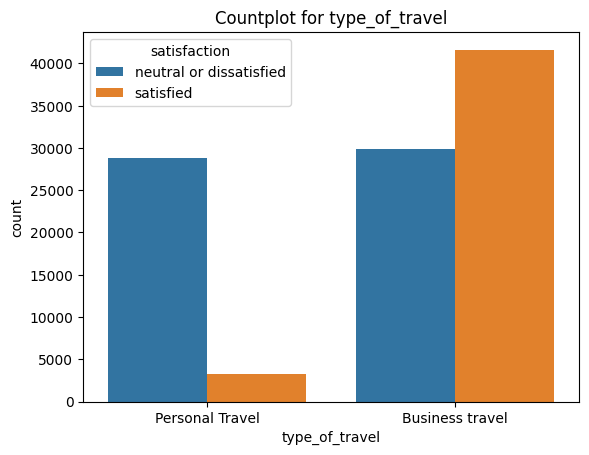

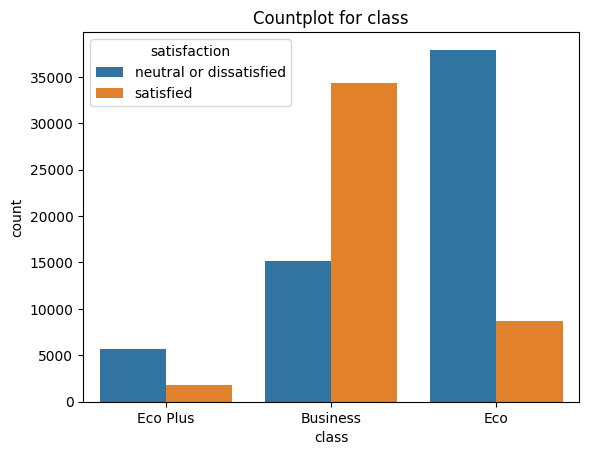

In [81]:
for column in categorical.columns.drop('satisfaction'):
    sns.countplot(data=df, x=column , hue='satisfaction')
    plt.title(f'Countplot for {column}')
    plt.show() # Show each plot separately

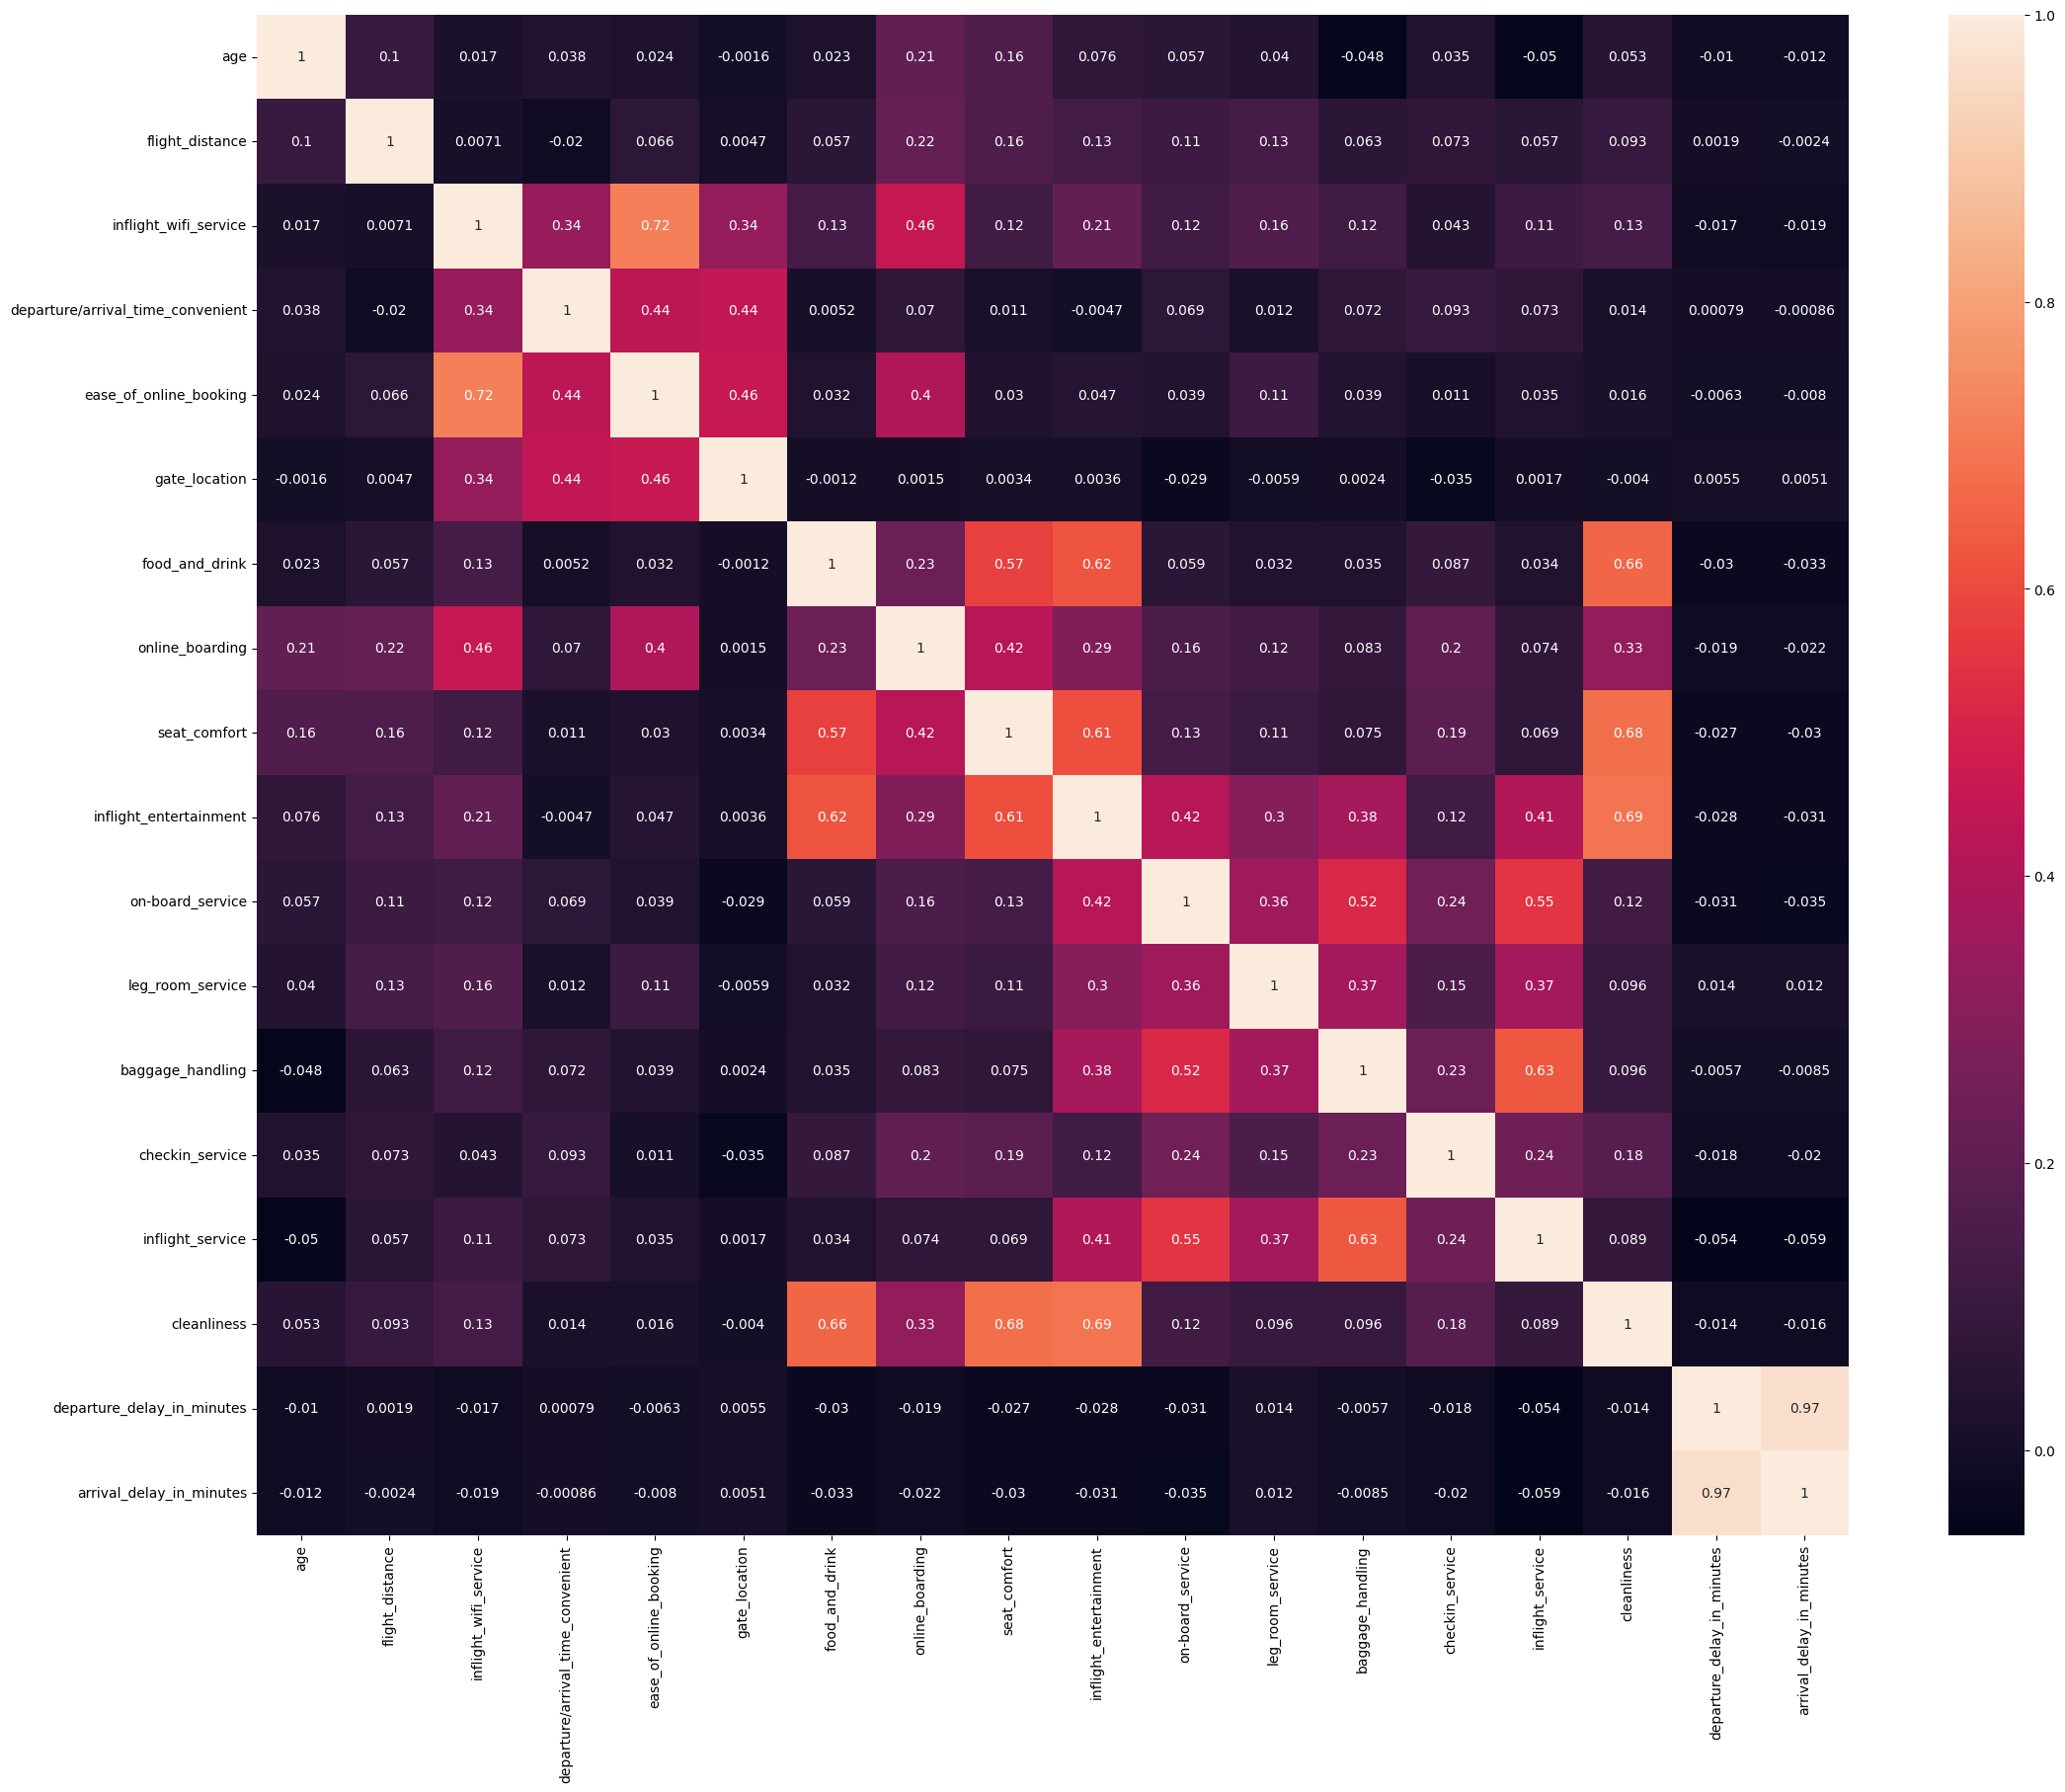

In [82]:
# Calculate correlations only for numeric features
plt.figure(figsize=(26,20))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()


# ML

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             103594 non-null  object 
 1   customer_type                      103594 non-null  object 
 2   age                                103594 non-null  int64  
 3   type_of_travel                     103594 non-null  object 
 4   class                              103594 non-null  object 
 5   flight_distance                    103594 non-null  int64  
 6   inflight_wifi_service              103594 non-null  int64  
 7   departure/arrival_time_convenient  103594 non-null  int64  
 8   ease_of_online_booking             103594 non-null  int64  
 9   gate_location                      103594 non-null  int64  
 10  food_and_drink                     103594 non-null  int64  
 11  online_boarding                    103594 no

In [86]:
le = LabelEncoder()
df['satisfaction'] = le.fit_transform(df['satisfaction'])
df['inflight_wifi_service'] = le.fit_transform(df['inflight_wifi_service'])
df['gender'] = le.fit_transform(df['gender'])
df['customer_type'] = le.fit_transform(df['customer_type'])
df['type_of_travel'] = le.fit_transform(df['type_of_travel'])
df['class'] = le.fit_transform(df['class'])


In [87]:
df

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,0
103900,1,0,49,0,0,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,1
103901,1,1,30,0,0,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0
103902,0,1,22,0,1,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,0


In [88]:
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
X_train.shape

(82875, 22)

In [91]:
model = LogisticRegression(max_iter=20000)  # Increase the max_iter value
model.fit(X_train, y_train)


LogisticRegression(max_iter=20000)

In [92]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8739321395820262


In [93]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_predict = decision_tree.predict(X_test)

acc_decision_tree = accuracy_score(y_test , y_predict)
acc_decision_tree

0.9458468072783436

In [94]:
knn = KNeighborsClassifier()
knn.fit(X_train , y_train)
y_predict = knn.predict(X_test)

acc_knn = accuracy_score(y_test , y_predict)
acc_knn

0.7487813118393745

In [95]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[10574  1081]
 [ 1531  7533]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11655
           1       0.87      0.83      0.85      9064

    accuracy                           0.87     20719
   macro avg       0.87      0.87      0.87     20719
weighted avg       0.87      0.87      0.87     20719



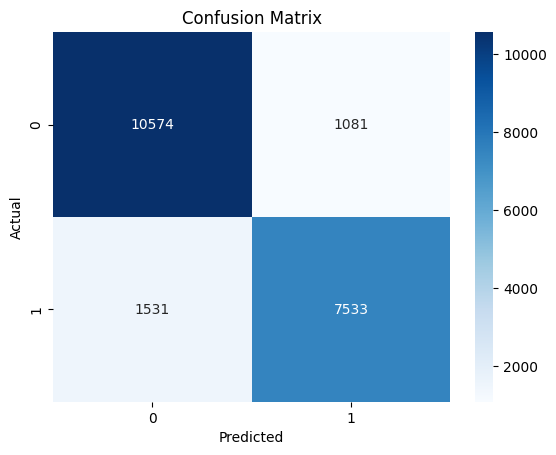

In [96]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

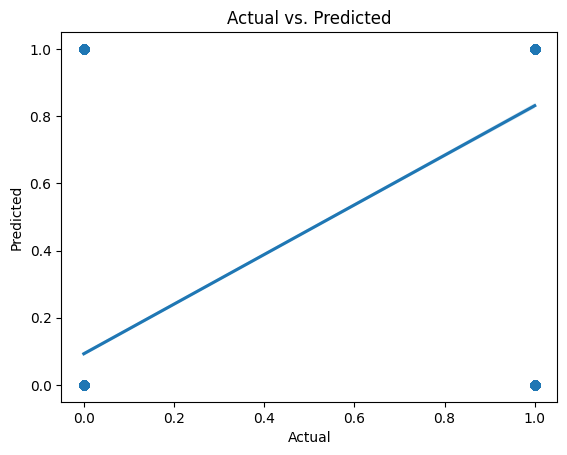

In [97]:
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [99]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Decision Tree'],
    'Score': [acc_knn, accuracy,  acc_decision_tree]})
models.sort_values(by='Score')

,Model,Score
0,KNN,0.748781
1,Logistic Regression,0.873932
2,Decision Tree,0.945847
